### This notebook shows the creation and usage of an output node that is going to be used for inference
---
[1. Loading the needed functions via the pipeline](#step1)

[2. Create functions needed to create the inference function](#step2)

[3. Do inference using the function](#step3)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


In [3]:
from pathlib import Path
import sys
import yaml
import numpy as np
sys.path.append("../../")

In [74]:
from pytorch_toolbox.pipeline import PipelineGraph
from src.train_with_template import lookups
from src.data import Image, match_prediction_probs_with_labels
from src.image import get_image_from_class, plot_rgby, get_unique_classes

#### 1. Loading the needed functions via pipeline <a id='step1'/>

In [5]:
CONFIG_FILE = Path("../configs/se_resnext50_32x4d_two_input_fc_template.yml")

In [6]:
with CONFIG_FILE.open("r") as f:
    config = yaml.load(f)

In [7]:
pipeline_graph = PipelineGraph.create_pipeline_graph_from_config(config)

In [8]:
pipeline_graph.sorted_node_names

['CreateLovaszHingeFlatLoss',
 'CreateSoftF1Loss',
 'CreateFocalLoss',
 'CreateF1SoftMetric',
 'CreateAccuracyMetric',
 'CreateModel',
 'CreateResultRecorder',
 'CreateGradientClippingLearnerCallback',
 'CreateLabelExtractorCallback',
 'CreateCallbacksForInference',
 'CreateLearnerForInference',
 'CreateCallbacks',
 'CreateTimeStampedSavePath',
 'RunRecordResults',
 'SaveConfiguration',
 'CreateCSVLoggerLearnerCallback',
 'CreateTrainingScheme',
 'CreateSamplerFunction',
 'CreateSampler',
 'CreateDenormalizeFunction',
 'CreateOutputRecorderLearnerCallback',
 'CreateLearnerCallbacks',
 'CreateLearner',
 'CreateNormalizeFunction',
 'CreateTestAugmentationFunction',
 'CreateAugmentationFunction',
 'CreateOpenImageFunction',
 'CreateTestingDataset',
 'CreateDataBunchForInference',
 'CreateInference',
 'CreateValidationDataset',
 'CreateTrainingDataset',
 'LoadTrainingData',
 'CreateDataSplitter',
 'LoadTestingData',
 'CreateDataBunch',
 'RunTrainingLoop']

##### 2. Create the functions needed to create the inference function <a id='step2'/>

In [9]:
pipeline_graph.run(reference_lookup=lookups, to_node="CreateInference")
create_inference_fn = pipeline_graph.get_node_output("CreateInference")

Uncomment to print out some classes from all the possible classes, pass None to get all the classes

In [79]:
unique_classes = get_unique_classes()
pprint(unique_classes)

NameError: name 'pprint' is not defined

In [ ]:
pr

In [10]:
image = get_image_from_class(["Mitochondria"])[0]

In [11]:
image.shape

(1024, 1024, 4)

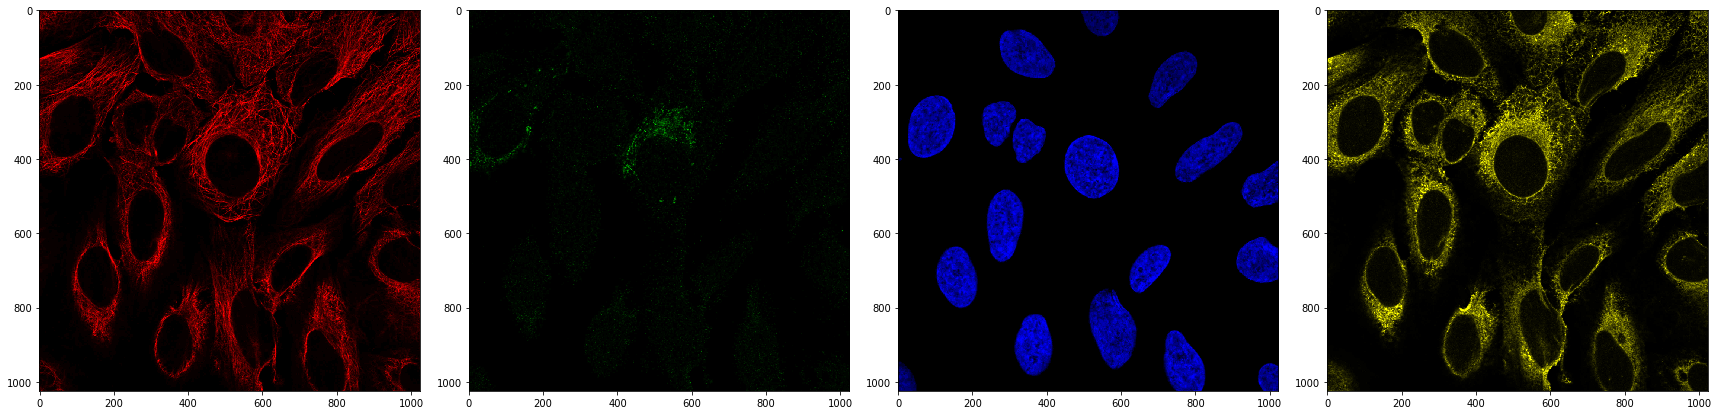

In [12]:
plot_rgby(image)

In [13]:
names, prediction_probs = create_inference_fn(image)